# Config

In [1]:
COUNT_FAILED_ORDERS = True

# Imports

In [2]:
import pandas as pd

import sys
sys.path.append("..") #There are better ways to do this
from calculation_functions.CalculateTimeToNextOrder import CalculateTimeToNextOrder

import matplotlib.pyplot as plt

%matplotlib inline

# Reading Data

In [3]:
Data = pd.read_csv("../data/machine_learning_challenge_order_data.csv.gz")
Data

,customer_id,order_date,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id
0,000097eabfd9,2015-06-20,19,1.0,0,0.0,0.000,11.46960,5803498,20326,1779,30231,4356
1,0000e2c6d9be,2016-01-29,20,1.0,0,0.0,0.000,9.55800,239303498,76547,1619,30359,4356
2,000133bb597f,2017-02-26,19,1.0,0,0.0,0.493,5.93658,206463498,33833,1619,30359,4324
3,00018269939b,2017-02-05,17,1.0,0,0.0,0.493,9.82350,36613498,99315,1619,30359,4356
4,0001a00468a6,2015-08-04,19,1.0,0,0.0,0.493,5.15070,225853498,16456,1619,29463,4356
...,...,...,...,...,...,...,...,...,...,...,...,...,...
786595,fffe9d5a8d41,2016-09-30,20,NaN,1,0.0,0.000,10.72620,983498,10346,1779,29463,212
786596,ffff347c3cfa,2016-08-17,21,1.0,0,0.0,0.000,7.59330,52893498,41978,1619,30359,4356
786597,ffff347c3cfa,2016-09-15,21,2.0,0,0.0,0.000,5.94720,164653498,41978,1619,30359,4356
786598,ffff4519b52d,2016-04-02,19,1.0,0,0.0,0.000,21.77100,16363498,80562,1491,29751,4228


# Data Validation
Checking if the data makes sense, or whether there are obvious errors
### Type Check

In [4]:
#Checking if datatypes make sense
Data.dtypes

#order_date -> to_datetime

customer_id             object
order_date              object
order_hour               int64
customer_order_rank    float64
is_failed                int64
voucher_amount         float64
delivery_fee           float64
amount_paid            float64
restaurant_id            int64
city_id                  int64
payment_id               int64
platform_id              int64
transmission_id          int64
dtype: object

### NaN Check

In [5]:
#Checking for unexpected NaNs
Data.info()
#NaNs only in customer_rank, which is expected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786600 entries, 0 to 786599
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_id          786600 non-null  object 
 1   order_date           786600 non-null  object 
 2   order_hour           786600 non-null  int64  
 3   customer_order_rank  761833 non-null  float64
 4   is_failed            786600 non-null  int64  
 5   voucher_amount       786600 non-null  float64
 6   delivery_fee         786600 non-null  float64
 7   amount_paid          786600 non-null  float64
 8   restaurant_id        786600 non-null  int64  
 9   city_id              786600 non-null  int64  
 10  payment_id           786600 non-null  int64  
 11  platform_id          786600 non-null  int64  
 12  transmission_id      786600 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 78.0+ MB


### Distributions Check
First we calculate the target variable:

In [6]:
#Calculating the target variable
Data = CalculateTimeToNextOrder(Data, COUNT_FAILED_ORDERS)
Data

,customer_id,order_date,order_hour,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id,days_to_next_order,customer_order_rank
0,000097eabfd9,2015-06-20,19,0,0.0,0.000,11.46960,5803498,20326,1779,30231,4356,NaN,1
1,0000e2c6d9be,2016-01-29,20,0,0.0,0.000,9.55800,239303498,76547,1619,30359,4356,NaN,1
2,000133bb597f,2017-02-26,19,0,0.0,0.493,5.93658,206463498,33833,1619,30359,4324,NaN,1
3,00018269939b,2017-02-05,17,0,0.0,0.493,9.82350,36613498,99315,1619,30359,4356,NaN,1
4,0001a00468a6,2015-08-04,19,0,0.0,0.493,5.15070,225853498,16456,1619,29463,4356,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786595,fffe9d5a8d41,2016-09-30,20,1,0.0,0.000,10.72620,983498,10346,1779,29463,212,NaN,3
786596,ffff347c3cfa,2016-08-17,21,0,0.0,0.000,7.59330,52893498,41978,1619,30359,4356,29.0,1
786597,ffff347c3cfa,2016-09-15,21,0,0.0,0.000,5.94720,164653498,41978,1619,30359,4356,NaN,2
786598,ffff4519b52d,2016-04-02,19,0,0.0,0.000,21.77100,16363498,80562,1491,29751,4228,NaN,1


#### 1. Numerical Features

In [7]:
#Features that are numeric in nature
numeric_features = ['order_hour', 'customer_order_rank', 'voucher_amount', 'delivery_fee', 'amount_paid', 'days_to_next_order']

#Checking for non-sensical values (e.g. negative values, order_hour>23, and so on.)
Data[numeric_features].describe()
#Outside order_hour, it seems we have long tails in the distributions

,order_hour,customer_order_rank,voucher_amount,delivery_fee,amount_paid,days_to_next_order
count,786600.000000,786600.000000,786600.000000,786600.00000,786600.000000,541145.000000
mean,17.588796,9.803844,0.091489,0.18118,10.183271,38.416809
std,3.357192,18.471856,0.479558,0.36971,5.618121,72.909039
min,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,16.000000,1.000000,0.000000,0.00000,6.648120,4.000000
50%,18.000000,3.000000,0.000000,0.00000,9.027000,12.000000
75%,20.000000,10.000000,0.000000,0.00000,12.213000,36.000000
max,23.000000,386.000000,93.398900,9.86000,1131.030000,1362.000000


array([[<AxesSubplot:title={'center':'order_hour'}>,
        <AxesSubplot:title={'center':'customer_order_rank'}>],
       [<AxesSubplot:title={'center':'voucher_amount'}>,
        <AxesSubplot:title={'center':'delivery_fee'}>],
       [<AxesSubplot:title={'center':'amount_paid'}>,
        <AxesSubplot:title={'center':'days_to_next_order'}>]],
      dtype=object)

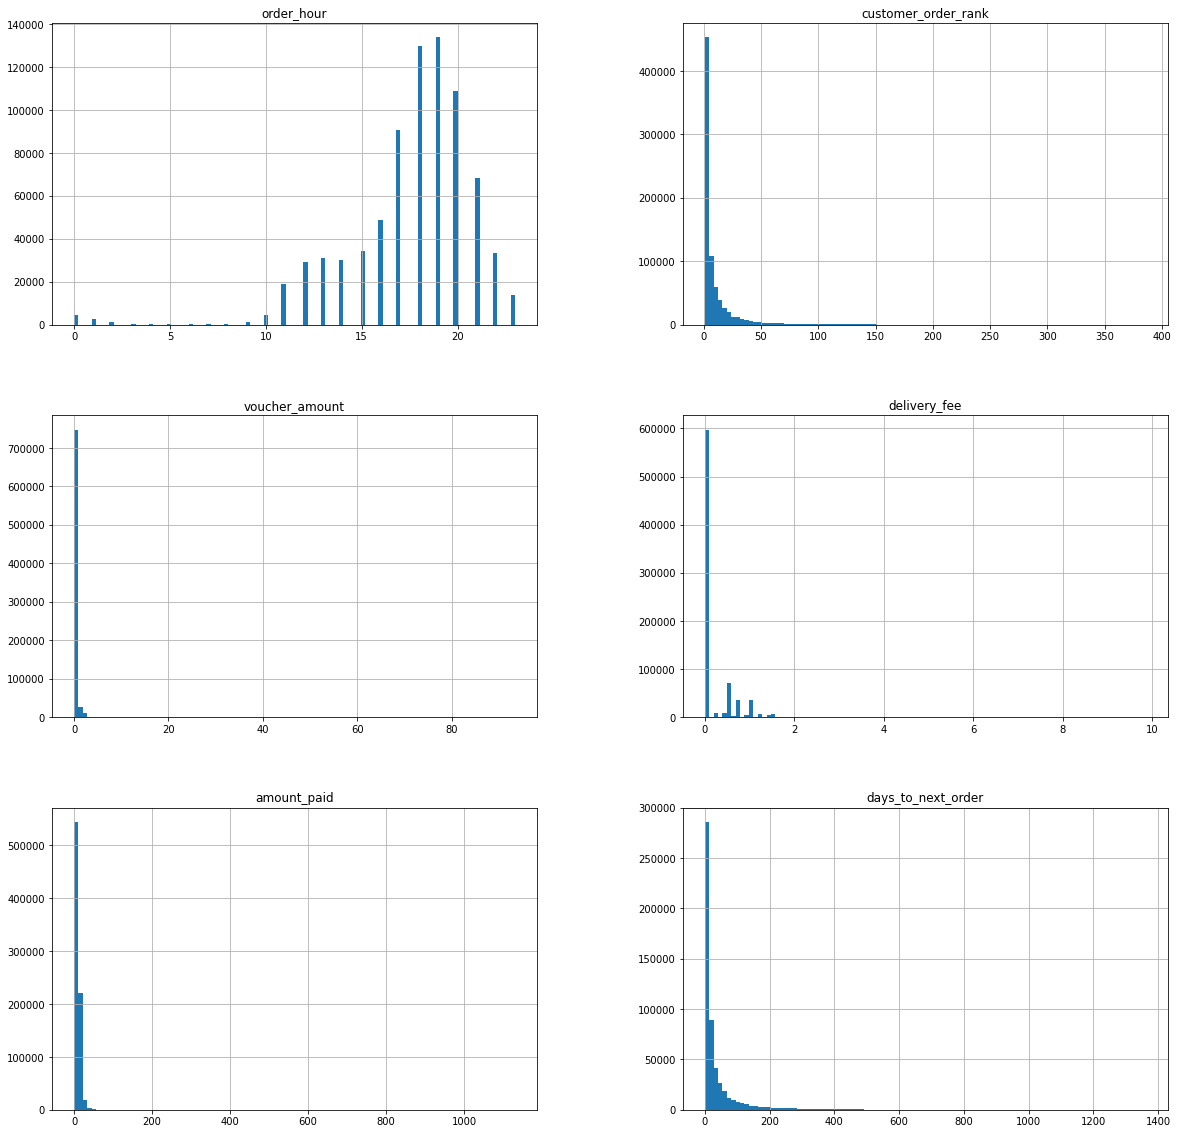

In [8]:
#Checking the distribtutions of the variables
Data[numeric_features].hist(bins=100, figsize=(20,20))
#As expected from the statistics, long-tailed distributions are prevalent

In [9]:
#Checking for correlated variables
Data[numeric_features].corr()
#No obvious strong correlation

,order_hour,customer_order_rank,voucher_amount,delivery_fee,amount_paid,days_to_next_order
order_hour,1.000000,-0.023234,-0.007971,-0.007638,-0.015829,0.020275
customer_order_rank,-0.023234,1.000000,-0.027861,-0.005651,-0.066160,-0.194650
voucher_amount,-0.007971,-0.027861,1.000000,-0.014310,-0.143809,0.020593
delivery_fee,-0.007638,-0.005651,-0.014310,1.000000,0.112384,0.010084
amount_paid,-0.015829,-0.066160,-0.143809,0.112384,1.000000,0.041697
days_to_next_order,0.020275,-0.194650,0.020593,0.010084,0.041697,1.000000


#### 2. Categorical Features

In [10]:
cat_features = ['customer_id', 'is_failed', 'restaurant_id', 'city_id', 'payment_id', 'platform_id', 'transmission_id']

print("Number of categories per variable:")
Data[cat_features].nunique()

Number of categories per variable:


customer_id        245455
is_failed               2
restaurant_id       13569
city_id              3749
payment_id              5
platform_id            14
transmission_id        10
dtype: int64

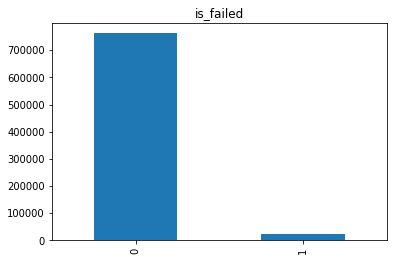

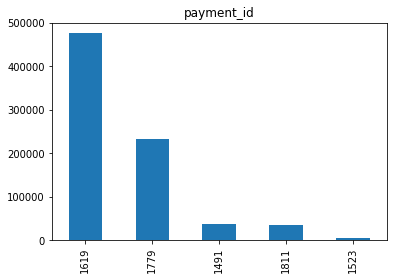

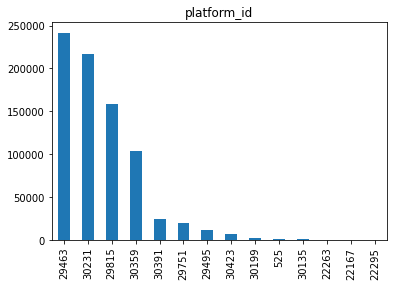

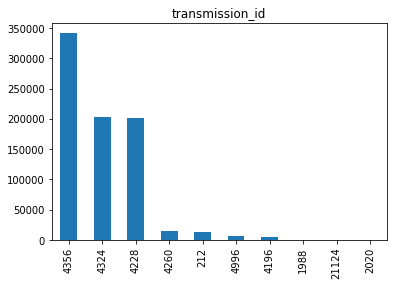

In [11]:
#For features with reasonable number of categories, let's see the distributions
for Column in  ['is_failed', 'payment_id', 'platform_id', 'transmission_id']:
    plt.figure()
    plt.title(Column)
    Data[Column].value_counts().plot(kind='bar')

#Also long-tailed, somehow.

#### 3. Time feature

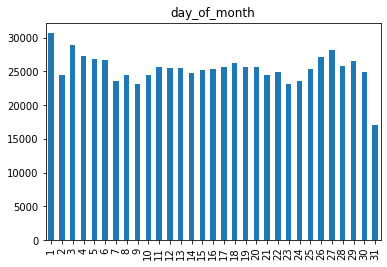

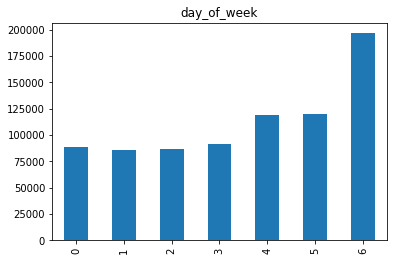

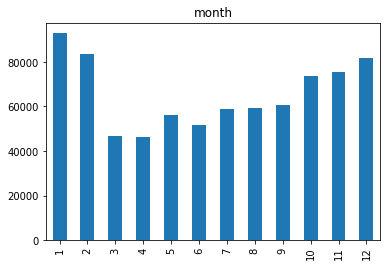

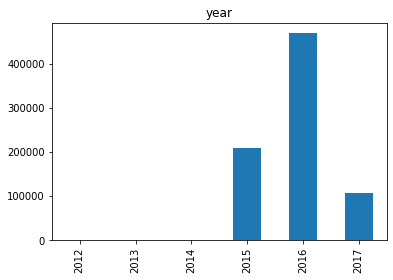

In [12]:
#Before we do this, we have to breakdown extract some time features
Data['day_of_month'] = Data.order_date.dt.day
Data['day_of_week'] = Data.order_date.dt.weekday
Data['month'] = Data.order_date.dt.month
Data['year'] = Data.order_date.dt.year

#And now let's check the distributions of our new variables
for Column in  ['day_of_month', 'day_of_week', 'month', 'year']:
    plt.figure()
    plt.title(Column)
    Data[Column].value_counts(sort = False).plot(kind='bar')

The distributions look reasonable with a few notes:
1. Really high relative number of orders on Sundays
2. Seems the winter season generally has more orders
3. We have few examples of data from before the starting date (should be discarded)